### 1. Given the function $ f(x) = -x^{4} + 2x^{3} + 2x^{2} - x $ and it's derivative $f'(x) = {- 4 x^3 + 6 x^2 + 4 x - 1}$

In [2]:
# Standard import and functions
# Run this cell first
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return -np.power(x, 4) + 2 * np.power(x, 3) + 2 * np.power(x, 2) - x


def df(x):
    return -4 * np.power(x, 3) + 6 * np.power(x, 2) + 4 * x - 1

#### a. Plot the function, and its gradient (derivative) from $x = -2$ to $x = 3$

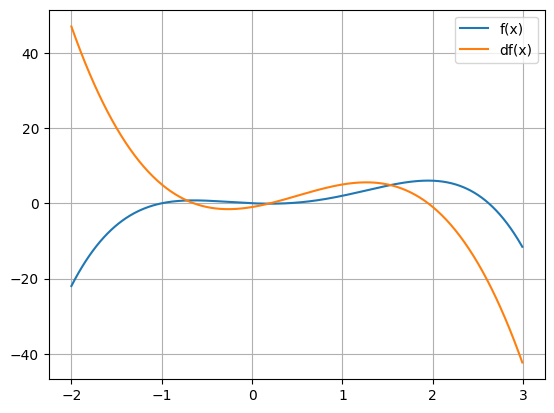

In [3]:
# Add your solution here
points = np.arange(-2, 3, 0.01)  # can also use points = np.linspace(-2, 3, 100)
plt.plot(points, f(points), label="f(x)")
plt.plot(points, df(points), label="df(x)")

plt.legend()
plt.grid()
plt.show()

#### b. Maximize using gradient ascent. You can try step size 0.1 and start somewhere in the range $[-2, 3]$. 

Gradient ascent: $x^{(k+1)} = x^{(k)} + \gamma \Delta f(x^{(k)})$

In [4]:
# Add your solution here
def gradient_ascent(fun=f, dfun=df, num_iterations=100000, gamma=0.1):
    curr = np.random.uniform(-2, 3)

    while num_iterations > 0:
        curr += gamma * dfun(curr)
        num_iterations -= 1

    return curr


print(gradient_ascent())

-0.6462007926123104


##### How does the choice of starting point and step size affect the algorithm's performance?

##### Is there a starting point where the algorithm would not even be able to find a local maximum?

In [ ]:
# Add your solution here

#### c. Assume that we are only interested in maxima of $f(x)$, where $-2 \leq x \leq 3$, and x increases in step length of 0.5 ($\Delta x = 0.5$). Perform an exhaustive search to maximize $f(x)$ and plot the result

In [5]:
# Add your solution here
def exhaustive_search(fun=f, range=(-2, 3), step_length=0.05):
    x = np.arange(range[0], range[1], step_length)
    res = x[0]

    for i in x:
        if fun(i) > fun(res):
            res = i

    return res


print(exhaustive_search())

1.9500000000000037


#### d. Gradient ascent and hill climbing are quite similar, and they are based almost exclusively on exploitation. Can you think of any additions to these algorithms in order to do more exploration?

In [15]:
# Add your solution here
import random


def simulated_annealing(
    fun=f, step_size=0.05, temperature=5, min_temperature=0.0001, alpha=0.9
):
    prev = 0.0
    succ = 0.0
    curr = np.random.normal(-2, 3)

    while temperature > min_temperature:
        prev = f(curr - step_size)
        succ = f(curr + step_size)

        if random.uniform(0, 100) < temperature:
            if prev > curr:
                curr = succ
            elif succ > curr:
                curr = prev
            continue

        if prev > curr:
            curr = prev
        elif succ > curr:
            curr = succ

        temperature *= alpha  # cooling phase

    return curr


print(simulated_annealing())

5.049796406082757


#### e. Which algorithm do you think is the most efficient at maximizing $f(x)$ under the conditions in Problem **d**; exhaustive search or simulated annealing?

In [ ]:
# Add your solution here